Uploads file

# Data Loading

This section imports necessary libararies and loads the training and test data from CSV files. It assumes the
data is in a format similar to the Wild Blueberry Yield dataset, where the
features are in all columns
is in the last column.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load training data from CSV (assuming wild blueberry dataset)
train_data = np.genfromtxt("train.csv", delimiter=",", skip_header=1)
X_train = train_data[:, 1:-1]  # All columns except the last are features
Y_train = train_data[:, -1]   # Last column is the target (yield)

# Load test data from CSV (without target yield)
test_data = np.genfromtxt("test.csv", delimiter=",", skip_header=1)
test_ids = test_data[:, 0]
X_test = test_data[:, 1:]

In [2]:
# Correlation matrix between features and the target

corr_matrix = np.corrcoef(X_train[:, 1:-1], rowvar=False)

# Plot the heatmap for the feature correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=[f'Feature {i+2}' for i in range(X_train.shape[1] - 2)],
            yticklabels=[f'Feature {i+2}' for i in range(X_train.shape[1] - 2)])

plt.title('Correlation Matrix Heatmap (Features Only)')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

# Creating class MultivariateRegression
This code defines a class called `MultivariateRegression` for performing
multivariate linear regression. It includes methods for initializing the model,
adding an intercept term to the features, fitting the model using Ordinary Least
Squares (OLS), and making predictions on new data.

In [3]:
class MultivariateRegression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    # Add bias (intercept) term to the features
    def add_intercept(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    # Fit the model using Ordinary Least Squares (OLS)
    def fit(self):
      X_intercept = self.add_intercept(self.X)

      # OLS formula: B = (X'X)^-1 X'Y
      self.B = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ self.Y


    # Predict on new data
    def predict(self, X_new):
        X_new_intercept = self.add_intercept(X_new)
        return X_new_intercept @ self.B

    # Calculate the mean squared error (MSE) for test data (optional, if Y_test is available)
    def mse(self, X_test, Y_test):
        Y_pred = self.predict(X_test)
        return np.mean((Y_test - Y_pred) ** 2)

    # Return R-squared value to evaluate the model (optional, if Y_test is available)
    def r2_score(self, X_test, Y_test):
        Y_pred = self.predict(X_test)
        ss_res = np.sum((Y_test - Y_pred) ** 2)
        ss_tot = np.sum((Y_test - np.mean(Y_test)) ** 2)
        return 1 - (ss_res / ss_tot)

    def MAE(self,X_Test, Y_test):
      Y_pred = self.predict(X_test)
      return np.sum(np.abs(Y_pred-Y_test))/np.size(Y_pred)

# Model Training, Prediction, and Evaluation

This section trains the MultivariateRegression model using the training data,
makes predictions on the test data, and optionally evaluates the model's
performance using metrics like Mean Absolute Error (MAE). It also saves the
predictions to a CSV file and visualizes them using a plot.

Predicted yields for test.csv:
[4631.87642172 6992.38361648 6168.31079015 ... 7456.87245712 7629.70211076
 4177.27187754]


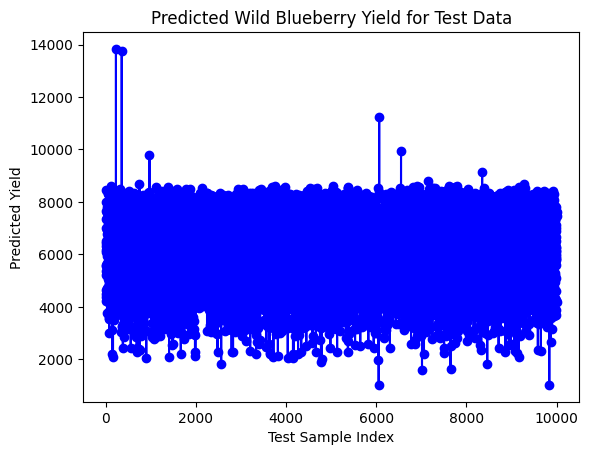

In [4]:
# Initialize and train the regression model
model = MultivariateRegression(X_train, Y_train)
model.fit()

# Predict on test.csv (which does not have the yield)
predictions = model.predict(X_test)

# Print the predicted yields for the test data
print("Predicted yields for test.csv:")
print(predictions)
# mae_value = model.MAE(X_test, Y_test)
# print("Mean Absolute Error (MAE):", mae_value)

# Optionally: Save the predictions to a CSV file for submission
# np.savetxt("predictions.csv", predictions, delimiter=",", header="Predicted_Yield", comments="")

plt.plot(predictions, marker='o', linestyle='-', color='b')
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted Yield")
plt.title("Predicted Wild Blueberry Yield for Test Data")
plt.show()

#### Mean absolute error

In [5]:
def MAE(Y_pred, Y_true):
  return np.sum(np.abs(Y_pred-Y_true))/np.size(Y_pred)

In [6]:
submission = np.vstack((test_ids  , predictions)).T

np.savetxt("submission.csv", submission, delimiter=",", header="id,Predicted_Yield", comments="", fmt=['%d', '%.5f'])